# Comparison with Finite Differences Method

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import style
style.use('ggplot')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from scipy.interpolate import interp1d
from mpl_toolkits.mplot3d import axes3d, Axes3D
from Functions import*
from FiniteDifferences import*

In [2]:
physical_devices = tf.config.list_physical_devices('GPU') 

We must first set the parameters of the PDE as in the intervals (5.11)

In [3]:
T = 21 / 365
n = 21 
a_0 = [0.2,1.0]
a_1 = [0.5,0.7]
b_0 = [-0.3,0.3]
b_1 = [-0.2,0.2]
gamma = [0.5,1.5]
x_0 = 15.

# Bear Put Option

We apply the same computations to a bear put option with payoff
$$
(13-S_{t_n})^+-(17-S_{t_n})^+
$$

First, we compute the hedging prices

In [11]:
hedges_bf = []

def derivative(path):
    return tf.nn.relu((13)-path[-1])-tf.nn.relu((17)-path[-1])
 
for x_0 in np.linspace(5.,15.,20):
    x_0 = x_0.item()
    p, _ = optimal_hedge(derivative,a_0,a_1,b_0,b_1,gamma,x_0,T,n,
                             depth = 4,nr_neurons = 256,EPOCHS = 50,l_r = 0.0075,BATCH_SIZE =256,hedge = "hedge")
    hedges_bf.append(p)

 22%|██▏       | 11/50 [00:08<00:29,  1.32it/s]

Iteration:10, Price of Hedge: -4.022325038909912, Loss: 0.01588279940187931


 42%|████▏     | 21/50 [00:16<00:23,  1.23it/s]

Iteration:20, Price of Hedge: -4.006897449493408, Loss: 0.0007292205118574202


 62%|██████▏   | 31/50 [00:24<00:14,  1.28it/s]

Iteration:30, Price of Hedge: -3.994805097579956, Loss: 6.692488386761397e-05


 82%|████████▏ | 41/50 [00:32<00:07,  1.24it/s]

Iteration:40, Price of Hedge: -3.9955508708953857, Loss: 0.00011466028809081763


 22%|██▏       | 11/50 [00:08<00:27,  1.41it/s]

Iteration:10, Price of Hedge: -4.029767036437988, Loss: 0.0009979828028008342


 42%|████▏     | 21/50 [00:15<00:21,  1.36it/s]

Iteration:20, Price of Hedge: -4.020796775817871, Loss: 0.002254919847473502


 62%|██████▏   | 31/50 [00:22<00:13,  1.38it/s]

Iteration:30, Price of Hedge: -4.0052809715271, Loss: 0.00037162547232583165


 82%|████████▏ | 41/50 [00:31<00:06,  1.31it/s]

Iteration:40, Price of Hedge: -3.9959867000579834, Loss: 0.0004871566197834909


 22%|██▏       | 11/50 [00:08<00:28,  1.39it/s]

Iteration:10, Price of Hedge: -3.984494686126709, Loss: 0.0029580481350421906


 42%|████▏     | 21/50 [00:15<00:21,  1.36it/s]

Iteration:20, Price of Hedge: -3.9889206886291504, Loss: 0.0002510498743504286


 62%|██████▏   | 31/50 [00:22<00:14,  1.35it/s]

Iteration:30, Price of Hedge: -3.9990954399108887, Loss: 0.00010165495768887922


 82%|████████▏ | 41/50 [00:30<00:06,  1.29it/s]

Iteration:40, Price of Hedge: -4.003809452056885, Loss: 5.9147452702745795e-05


 22%|██▏       | 11/50 [00:08<00:29,  1.34it/s]

Iteration:10, Price of Hedge: -3.9749960899353027, Loss: 0.0016943850787356496


 42%|████▏     | 21/50 [00:16<00:23,  1.22it/s]

Iteration:20, Price of Hedge: -3.988215684890747, Loss: 0.0014010007726028562


 62%|██████▏   | 31/50 [00:24<00:16,  1.17it/s]

Iteration:30, Price of Hedge: -4.002688884735107, Loss: 0.003268566681072116


 82%|████████▏ | 41/50 [00:31<00:07,  1.28it/s]

Iteration:40, Price of Hedge: -4.0059027671813965, Loss: 0.00028183500398881733


 22%|██▏       | 11/50 [00:10<00:36,  1.06it/s]

Iteration:10, Price of Hedge: -4.019533634185791, Loss: 0.029367413371801376


 42%|████▏     | 21/50 [00:18<00:22,  1.29it/s]

Iteration:20, Price of Hedge: -4.00290584564209, Loss: 0.018043285235762596


 62%|██████▏   | 31/50 [00:26<00:14,  1.33it/s]

Iteration:30, Price of Hedge: -3.9941306114196777, Loss: 0.005325783044099808


 82%|████████▏ | 41/50 [00:33<00:06,  1.37it/s]

Iteration:40, Price of Hedge: -3.998168468475342, Loss: 0.014622990041971207


 22%|██▏       | 11/50 [00:08<00:28,  1.36it/s]

Iteration:10, Price of Hedge: -4.0179643630981445, Loss: 0.02626112848520279


 42%|████▏     | 21/50 [00:16<00:22,  1.26it/s]

Iteration:20, Price of Hedge: -4.013359069824219, Loss: 0.006042621098458767


 62%|██████▏   | 31/50 [00:23<00:14,  1.30it/s]

Iteration:30, Price of Hedge: -3.9996232986450195, Loss: 0.0026488113217055798


 82%|████████▏ | 41/50 [00:31<00:06,  1.32it/s]

Iteration:40, Price of Hedge: -3.994288206100464, Loss: 0.00022575294133275747


 22%|██▏       | 11/50 [00:08<00:33,  1.18it/s]

Iteration:10, Price of Hedge: -3.9563605785369873, Loss: 0.00382973812520504


 42%|████▏     | 21/50 [00:16<00:20,  1.38it/s]

Iteration:20, Price of Hedge: -3.9536266326904297, Loss: 0.01585768163204193


 62%|██████▏   | 31/50 [00:24<00:17,  1.06it/s]

Iteration:30, Price of Hedge: -3.958115577697754, Loss: 0.05183188617229462


 82%|████████▏ | 41/50 [00:32<00:07,  1.26it/s]

Iteration:40, Price of Hedge: -3.9657793045043945, Loss: 0.021884020417928696


 22%|██▏       | 11/50 [00:09<00:33,  1.17it/s]

Iteration:10, Price of Hedge: -4.005519390106201, Loss: 0.051761362701654434


 42%|████▏     | 21/50 [00:17<00:23,  1.24it/s]

Iteration:20, Price of Hedge: -3.97361159324646, Loss: 0.038794808089733124


 62%|██████▏   | 31/50 [00:26<00:16,  1.16it/s]

Iteration:30, Price of Hedge: -3.971950054168701, Loss: 0.0312776155769825


 82%|████████▏ | 41/50 [00:35<00:07,  1.18it/s]

Iteration:40, Price of Hedge: -3.9762518405914307, Loss: 0.02812647446990013


 22%|██▏       | 11/50 [00:08<00:27,  1.40it/s]

Iteration:10, Price of Hedge: -3.985609769821167, Loss: 0.08331001549959183


 42%|████▏     | 21/50 [00:15<00:22,  1.30it/s]

Iteration:20, Price of Hedge: -3.9782488346099854, Loss: 0.22067677974700928


 62%|██████▏   | 31/50 [00:24<00:14,  1.32it/s]

Iteration:30, Price of Hedge: -3.9607303142547607, Loss: 0.10663799941539764


 82%|████████▏ | 41/50 [00:31<00:06,  1.31it/s]

Iteration:40, Price of Hedge: -3.950599193572998, Loss: 0.09429825842380524


 22%|██▏       | 11/50 [00:08<00:28,  1.36it/s]

Iteration:10, Price of Hedge: -3.9022858142852783, Loss: 0.07144331932067871


 42%|████▏     | 21/50 [00:16<00:22,  1.27it/s]

Iteration:20, Price of Hedge: -3.909843921661377, Loss: 0.07711544632911682


 62%|██████▏   | 31/50 [00:24<00:15,  1.25it/s]

Iteration:30, Price of Hedge: -3.9210619926452637, Loss: 0.12294279038906097


 82%|████████▏ | 41/50 [00:32<00:06,  1.32it/s]

Iteration:40, Price of Hedge: -3.9186530113220215, Loss: 0.10385896265506744


 22%|██▏       | 11/50 [00:09<00:31,  1.25it/s]

Iteration:10, Price of Hedge: -3.826612949371338, Loss: 0.34991008043289185


 42%|████▏     | 21/50 [00:17<00:25,  1.15it/s]

Iteration:20, Price of Hedge: -3.829455852508545, Loss: 0.2723565101623535


 62%|██████▏   | 31/50 [00:25<00:15,  1.26it/s]

Iteration:30, Price of Hedge: -3.8471438884735107, Loss: 0.1264767050743103


 82%|████████▏ | 41/50 [00:39<00:17,  1.93s/it]

Iteration:40, Price of Hedge: -3.852022886276245, Loss: 0.15832749009132385


 22%|██▏       | 11/50 [00:09<00:36,  1.06it/s]

Iteration:10, Price of Hedge: -3.7569704055786133, Loss: 0.4892602562904358


 42%|████▏     | 21/50 [00:18<00:23,  1.24it/s]

Iteration:20, Price of Hedge: -3.750701665878296, Loss: 0.19663006067276


 62%|██████▏   | 31/50 [00:26<00:14,  1.29it/s]

Iteration:30, Price of Hedge: -3.756676197052002, Loss: 0.21741458773612976


 82%|████████▏ | 41/50 [00:34<00:07,  1.19it/s]

Iteration:40, Price of Hedge: -3.74716854095459, Loss: 0.1493546962738037


 22%|██▏       | 11/50 [00:08<00:30,  1.29it/s]

Iteration:10, Price of Hedge: -3.6659202575683594, Loss: 0.5285114049911499


 42%|████▏     | 21/50 [00:16<00:21,  1.35it/s]

Iteration:20, Price of Hedge: -3.6682937145233154, Loss: 0.2670231759548187


 62%|██████▏   | 31/50 [00:24<00:14,  1.31it/s]

Iteration:30, Price of Hedge: -3.6656198501586914, Loss: 0.2235500067472458


 82%|████████▏ | 41/50 [00:31<00:07,  1.21it/s]

Iteration:40, Price of Hedge: -3.6618402004241943, Loss: 0.24478808045387268


 22%|██▏       | 11/50 [00:08<00:28,  1.36it/s]

Iteration:10, Price of Hedge: -3.5502994060516357, Loss: 0.3453454077243805


 42%|████▏     | 21/50 [00:15<00:20,  1.40it/s]

Iteration:20, Price of Hedge: -3.5270028114318848, Loss: 0.26808539032936096


 62%|██████▏   | 31/50 [00:24<00:16,  1.16it/s]

Iteration:30, Price of Hedge: -3.5093986988067627, Loss: 0.2975299656391144


 82%|████████▏ | 41/50 [00:33<00:07,  1.23it/s]

Iteration:40, Price of Hedge: -3.495173692703247, Loss: 0.301139771938324


 22%|██▏       | 11/50 [00:08<00:28,  1.38it/s]

Iteration:10, Price of Hedge: -3.270784378051758, Loss: 0.6093257665634155


 42%|████▏     | 21/50 [00:15<00:24,  1.21it/s]

Iteration:20, Price of Hedge: -3.296581983566284, Loss: 0.42073941230773926


 62%|██████▏   | 31/50 [00:24<00:15,  1.24it/s]

Iteration:30, Price of Hedge: -3.3149590492248535, Loss: 0.34166115522384644


 82%|████████▏ | 41/50 [00:32<00:07,  1.23it/s]

Iteration:40, Price of Hedge: -3.3336682319641113, Loss: 0.41307133436203003


 22%|██▏       | 11/50 [00:07<00:28,  1.37it/s]

Iteration:10, Price of Hedge: -3.0250349044799805, Loss: 1.3181583881378174


 42%|████▏     | 21/50 [00:16<00:21,  1.36it/s]

Iteration:20, Price of Hedge: -3.025538682937622, Loss: 0.3354395031929016


 62%|██████▏   | 31/50 [00:23<00:13,  1.42it/s]

Iteration:30, Price of Hedge: -3.033987283706665, Loss: 0.34290647506713867


 82%|████████▏ | 41/50 [00:30<00:06,  1.29it/s]

Iteration:40, Price of Hedge: -3.0480458736419678, Loss: 0.4170026183128357


 22%|██▏       | 11/50 [00:08<00:32,  1.18it/s]

Iteration:10, Price of Hedge: -2.753934621810913, Loss: 0.3621901273727417


 42%|████▏     | 21/50 [00:16<00:23,  1.24it/s]

Iteration:20, Price of Hedge: -2.7771878242492676, Loss: 0.5019747018814087


 62%|██████▏   | 31/50 [00:25<00:15,  1.22it/s]

Iteration:30, Price of Hedge: -2.796278715133667, Loss: 0.5292132496833801


 82%|████████▏ | 41/50 [00:33<00:07,  1.22it/s]

Iteration:40, Price of Hedge: -2.812103271484375, Loss: 0.40028178691864014


 22%|██▏       | 11/50 [00:07<00:27,  1.41it/s]

Iteration:10, Price of Hedge: -2.711158037185669, Loss: 1.5387392044067383


 42%|████▏     | 21/50 [00:15<00:21,  1.36it/s]

Iteration:20, Price of Hedge: -2.6881935596466064, Loss: 1.0344516038894653


 62%|██████▏   | 31/50 [00:23<00:14,  1.29it/s]

Iteration:30, Price of Hedge: -2.6740386486053467, Loss: 0.5609092712402344


 82%|████████▏ | 41/50 [00:31<00:07,  1.28it/s]

Iteration:40, Price of Hedge: -2.6623833179473877, Loss: 1.2176156044006348


 22%|██▏       | 11/50 [00:09<00:32,  1.21it/s]

Iteration:10, Price of Hedge: -2.3877522945404053, Loss: 2.6970086097717285


 42%|████▏     | 21/50 [00:17<00:22,  1.28it/s]

Iteration:20, Price of Hedge: -2.3980536460876465, Loss: 0.590598464012146


 62%|██████▏   | 31/50 [00:25<00:15,  1.26it/s]

Iteration:30, Price of Hedge: -2.39990496635437, Loss: 0.5801902413368225


 82%|████████▏ | 41/50 [00:33<00:06,  1.33it/s]

Iteration:40, Price of Hedge: -2.399095058441162, Loss: 0.5564013123512268


 22%|██▏       | 11/50 [00:08<00:30,  1.27it/s]

Iteration:10, Price of Hedge: -2.173748016357422, Loss: 0.851481556892395


 42%|████▏     | 21/50 [00:17<00:23,  1.26it/s]

Iteration:20, Price of Hedge: -2.1639339923858643, Loss: 1.5425281524658203


 62%|██████▏   | 31/50 [00:24<00:14,  1.32it/s]

Iteration:30, Price of Hedge: -2.159313678741455, Loss: 0.7701500654220581


 82%|████████▏ | 41/50 [00:32<00:07,  1.28it/s]

Iteration:40, Price of Hedge: -2.1576406955718994, Loss: 0.6158513426780701


100%|██████████| 50/50 [00:39<00:00,  1.26it/s]


Then we compute 

In [12]:
Nr_grid_s = 50
Nr_grid_t = 1000

start_value = 0
end_value = 20
time_from = 0.
time_to = T

def payoff_bf(x):
    return (13-x)*((13-x)>0)-(17-x)*((17-x)>0)


u_lower_bf,u_lower_grid_bf = nonlinear_pde(a_0[0],a_0[1],
                                      a_1[0],a_1[1],
                                      b_0[0],b_0[1],
                                      b_1[0],b_1[1],
                                      gamma[0],gamma[1],
                                      payoff_bf,
                                      start_value_from =start_value,
                                      start_value_to =end_value,
                                      Nr_grid_s = Nr_grid_s,
                                      Nr_grid_t = Nr_grid_t, 
                                      time_from = time_from, 
                                      time_to = time_to,
                                      minimize = True)
u_lower_interpol_bf=interp1d(np.linspace(start_value,end_value,Nr_grid_s),u_lower_bf)
u_upper_bf,u_upper_grid_bf = nonlinear_pde(a_0[0],a_0[1],
                                      a_1[0],a_1[1],
                                      b_0[0],b_0[1],
                                      b_1[0],b_1[1],
                                      gamma[0],gamma[1],
                                      payoff_bf,
                                      start_value_from =start_value,
                                      start_value_to =end_value,
                                      Nr_grid_s = Nr_grid_s,
                                      Nr_grid_t = Nr_grid_t, 
                                      time_from = time_from, 
                                      time_to = time_to,
                                      minimize = False)
u_upper_interpol_bf=interp1d(np.linspace(start_value,end_value,Nr_grid_s),u_upper_bf)

100%|██████████| 999/999 [00:02<00:00, 351.58it/s]


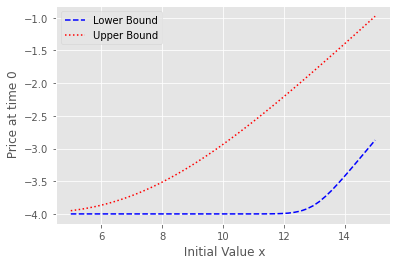

In [13]:
start_value_plot = 5
end_value_plot = 15

x=np.linspace(start_value_plot,end_value_plot,50)
u_low_bf = u_lower_interpol_bf(x)
u_up_bf = u_upper_interpol_bf(x)

plt.plot(x,u_low_bf,label="Lower Bound",linestyle = "dashed", color = "blue")
plt.plot(x,u_up_bf,label="Upper Bound",linestyle = "dotted", color = "red")
plt.xlabel(" Initial Value x")
plt.ylabel(" Price at time 0")
plt.legend()
plt.grid(True)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_2028\4075790340.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


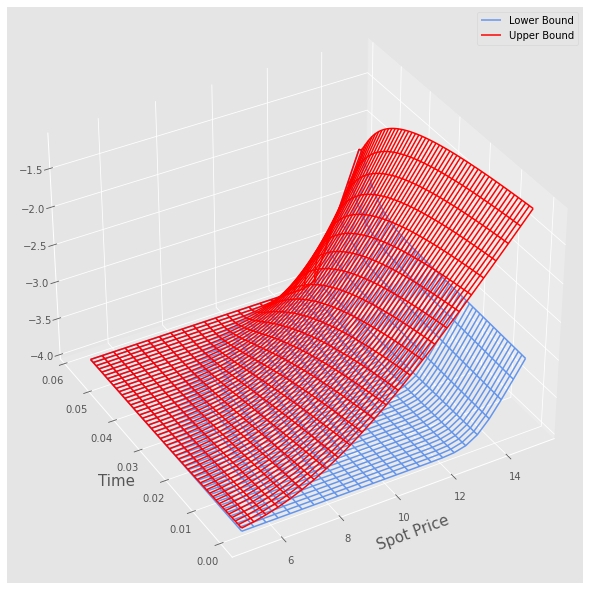

In [14]:
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)

ind_start_plot = int(Nr_grid_s*((start_value_plot-start_value)/(end_value-start_value)))
ind_end_plot = int(Nr_grid_s*((end_value_plot-start_value)/(end_value-start_value)))
s = np.linspace(start_value_plot,end_value_plot,ind_end_plot-ind_start_plot)
t = np.linspace(time_from,time_to,Nr_grid_t)

X, Y = np.meshgrid(s, t)
ax.plot_wireframe(X, Y , u_lower_grid_bf[:,ind_start_plot:ind_end_plot],color = "cornflowerblue",label="Lower Bound")
ax.plot_wireframe(X, Y , u_upper_grid_bf[:,ind_start_plot:ind_end_plot],color = "red", label = "Upper Bound")
ax.view_init(35,  -120)
ax.set_xlabel("Spot Price", fontsize=15)
ax.set_ylabel("Time", fontsize=15)
plt.legend()
plt.show()

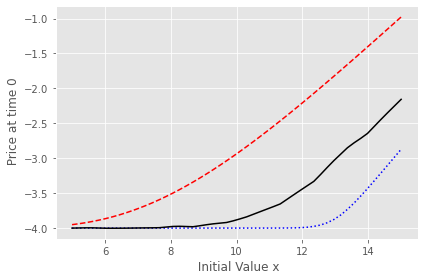

In [15]:
x=np.linspace(start_value_plot,end_value_plot,50)

hedges_nn_interpol_bf=interp1d(np.linspace(5,15,20),hedges_bf)
hedges_nn_bf = hedges_nn_interpol_bf(x)

u_low_bf = u_lower_interpol_bf(x)
u_up_bf = u_upper_interpol_bf(x)

plt.plot(x,u_low_bf,
         label="Lower Price Bound " +r'$\operatorname{inf}_{P\in \mathcal{A}(0,x,\Theta)}\mathbb{E}^P[\psi(X_T)]$',
         linestyle = "dotted", color = "blue")
plt.plot(x,u_up_bf,
         label="Upper Price Bound " +r'$\operatorname{sup}_{P\in \mathcal{A}(0,x,\Theta)}\mathbb{E}^P[\psi(X_T)]$',

         linestyle = "dashed", color = "red")
plt.plot(x,hedges_nn_bf,label="Price of Optimal Hedge",linestyle = "solid", color = "black")
plt.xlabel(" Initial Value x")
plt.ylabel(" Price at time 0")

plt.grid(True)
plt.tight_layout()
plt.show()